In [1]:
import sys, os
import sparse
import xsimlab as xs
import numpy as np
import pandas as pd
import igraph as ig
from pgljupyter import SceneWidget

In [2]:
import pgljupyter
pgljupyter.__version__

'1.0.2'

In [3]:
sys.path.insert(0, os.path.join(os.getcwd(), '..'))
import vmlab
from vmlab.models.vmango import vmango as model
from vmlab.enums import Nature, Position

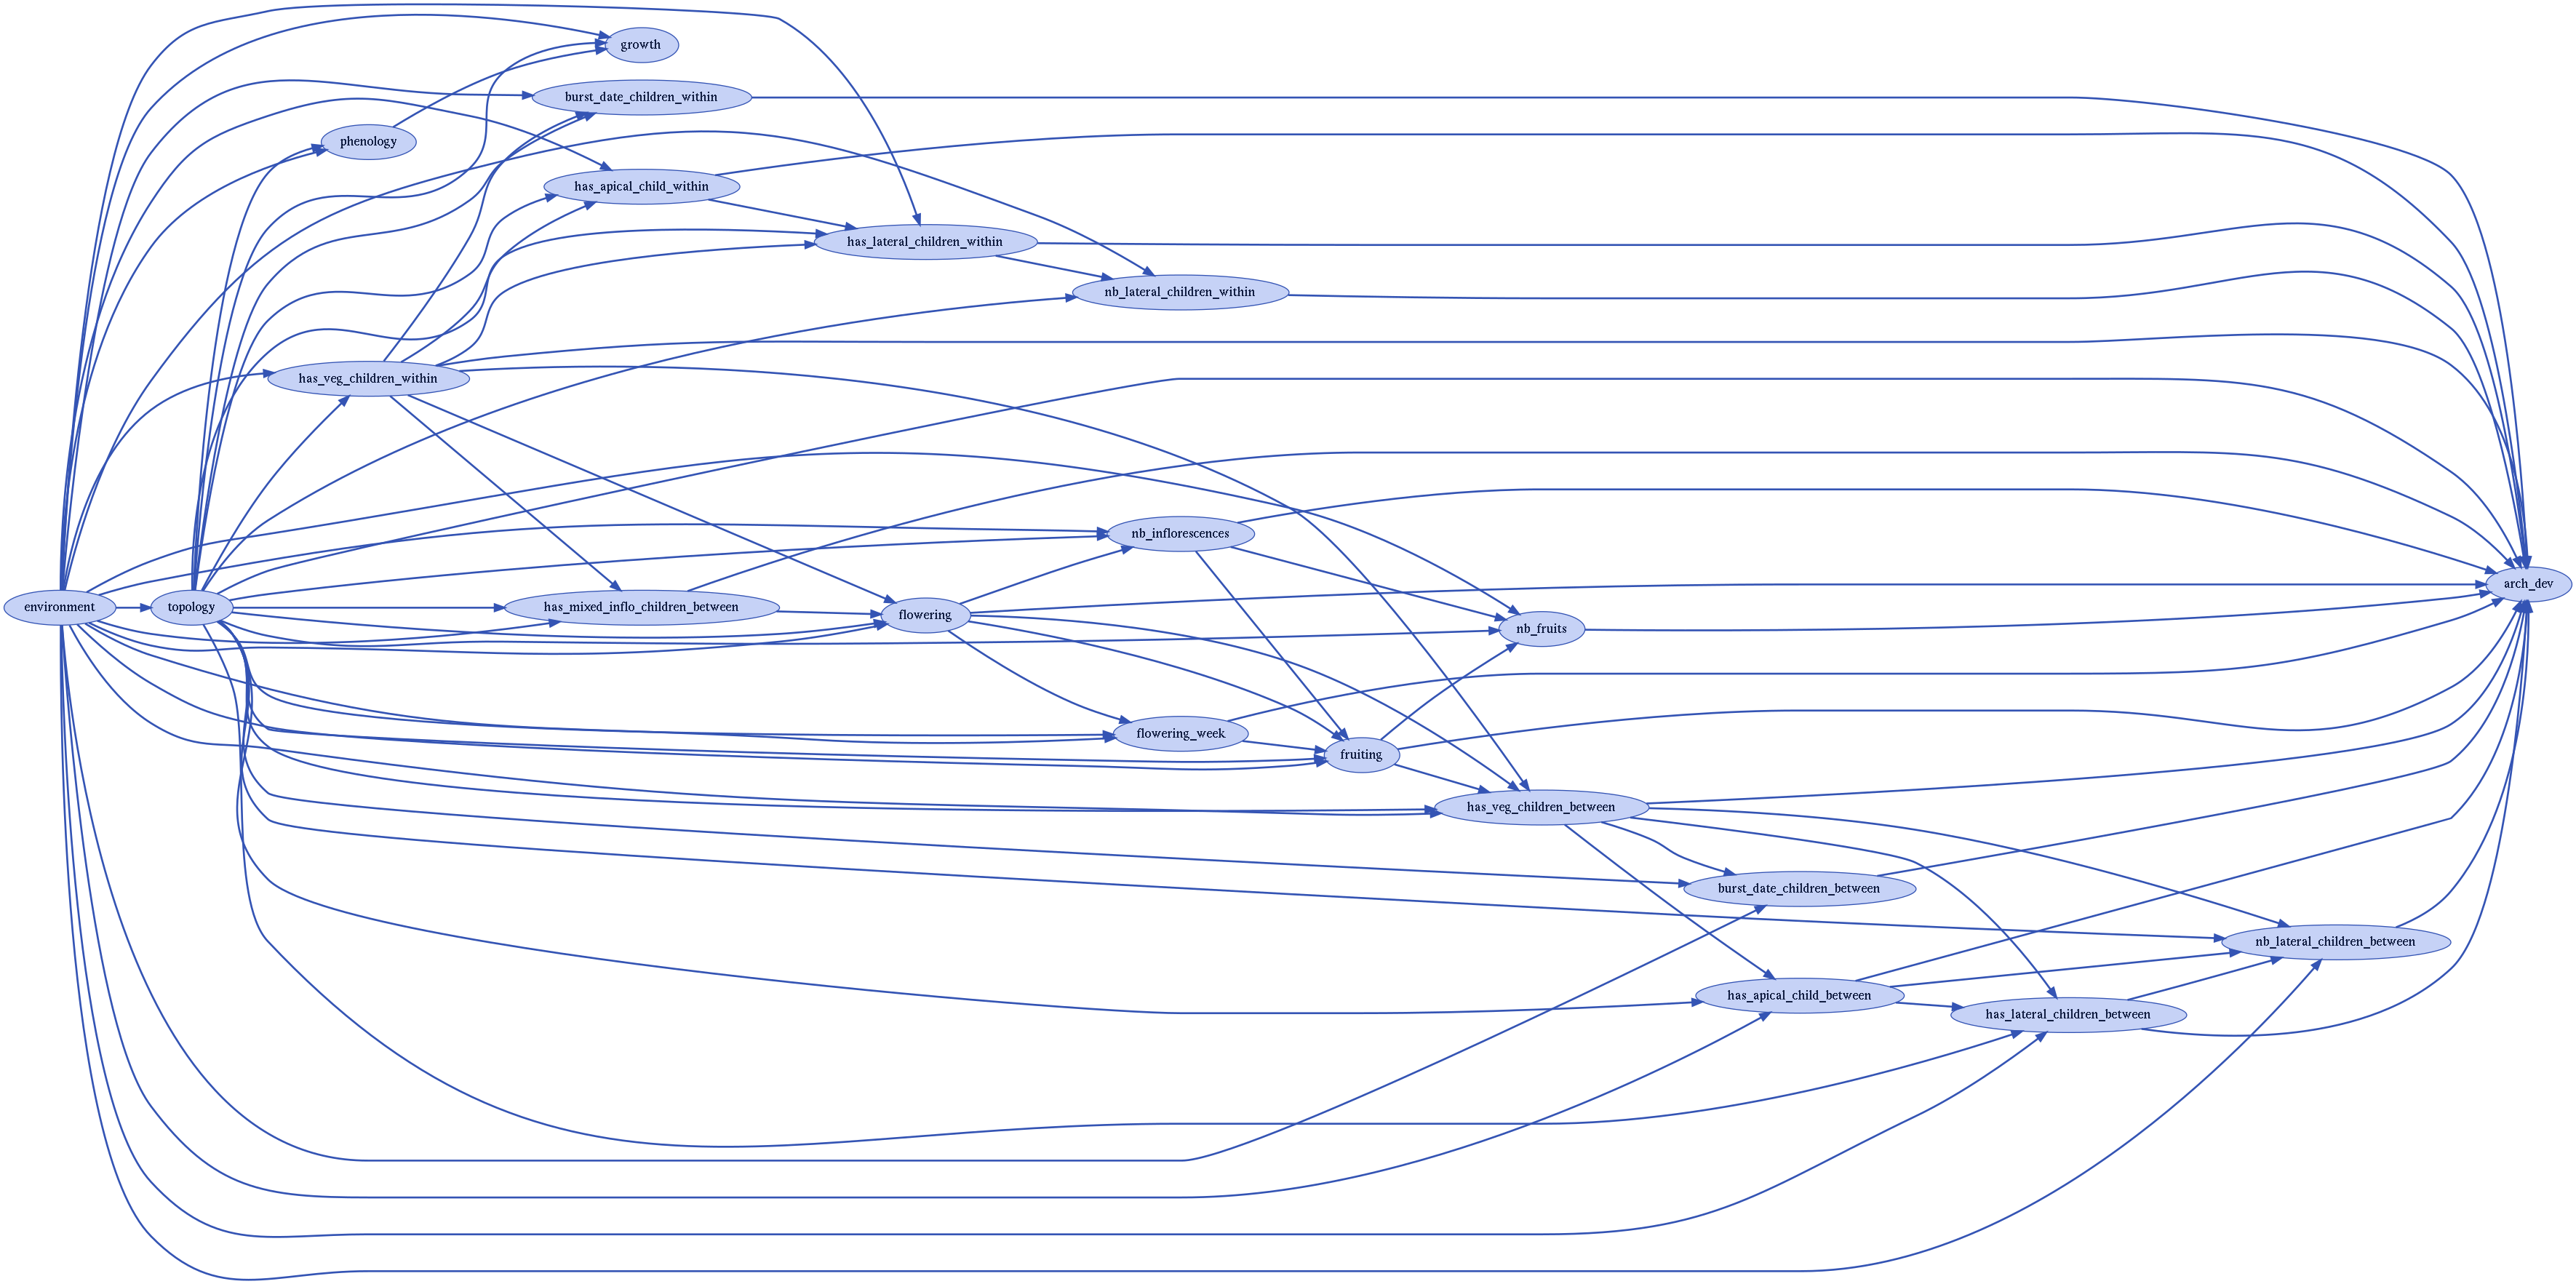

In [4]:
model.visualize()

In [5]:
nb_gus = 4
g = ig.Graph.Tree(nb_gus, 3, mode=ig.TREE_OUT)
adjacency = np.array(g.get_adjacency().data)

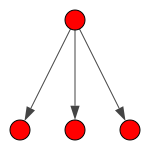

In [6]:
ig.plot(g, bbox=(0,0,150,150), layout=g.layout_reingold_tilford())

In [22]:
final_length_internodes = np.array([None, None, None, None], dtype=np.object)
final_length_internodes[0] = [10]
final_length_internodes[1] = [10]
final_length_internodes[2] = [10]
final_length_internodes[3] = [10]
ds = vmlab.create_setup(
    model=model,
    setup_toml='../share/setup/vmango.toml',
    clocks={
        'day': pd.date_range(start='2002-05-01', end='2004-09-01', freq="1d")
    },
    main_clock='day',
    input_vars={
        'topology': {
            'current_cycle': 3,
            'month_begin_veg_cycle': 7,
            'adjacency': adjacency,
            'nb_leaf': np.ones(nb_gus),
            'nb_inflo': np.ones(nb_gus),
            'nb_fruit': np.ones(nb_gus),
            'position': np.array([Position.APICAL, Position.LATERAL, Position.LATERAL, Position.APICAL])
        },
        'phenology': {
            'bloom_date': np.full(nb_gus, '2002-11-01')
        },
        'arch_dev': {
            'burst_date': np.array(['2002-04-01', '2002-06-01', '2002-06-01', '2002-06-01'], dtype='datetime64[D]'),
            'has_apical_child': np.ones(nb_gus),
            'nb_lateral_children': np.full(nb_gus, 2),
            'nature': np.full(nb_gus, Nature.VEGETATIVE)
        },
        'growth': {
            'final_length_internodes': final_length_internodes,
            'radius_gu': np.ones(nb_gus),
            'nb_internode': np.ones(nb_gus),
            'length_gu': np.ones(nb_gus),
            'final_length_gu': np.ones(nb_gus)
        }
    },
    output_vars=None
)

In [23]:
sw = SceneWidget()
sw

SceneWidget(scenes=[{'id': 'E1DUUpv8SErhNLTouaVtPhMcS', 'data': b'x\xdaSLrw\xf5\xf7e`Pp\xe0\xe5RPVVd\x00\x020\…

In [24]:
@xs.runtime_hook(stage='run_step')
def hook(model, context, state):
    if context['step'] == 0:
        sw.set_scenes([])
    if context['step'] % 10 == 0:
        scene = state[('topology', 'scene')]
        sw.set_scenes([state[('topology', 'scene')]], scales=[1/100])
    
ds_out = ds.xsimlab.run(model=model, decoding={ 'mask_and_scale': False }, hooks=[xs.monitoring.ProgressBar(), hook])

             0% | initialize 

/home/jvail/cirad/jvail/vmango-lab/notebooks/../vmlab/processes/topology.py:161: Warning: Invalid width value in setWidth. Must be positive
  self.scene = self.lsystem.sceneInterpretation(self.lstring)


In [25]:
ds_out

<xarray.Dataset>
Dimensions:                                                             (GU: 71, day: 855, hour: 24)
Coordinates:
  * GU                                                                  (GU) <U10 ...
  * day                                                                 (day) datetime64[ns] ...
  * hour                                                                (hour) int8 ...
Data variables:
    arch_dev__burst_date                                                (GU) datetime64[D] ...
    arch_dev__has_apical_child                                          (GU) float64 ...
    arch_dev__nature                                                    (GU) float64 ...
    arch_dev__nb_lateral_children                                       (GU) int64 ...
    burst_date_children_between__burst_date_children_between            (GU) datetime64[D] ...
    burst_date_children_between__table_dir_path                         <U80 ...
    burst_date_children_within__burst_date_children_within              (GU) datetime64[D] ...
    burst_date_children_within__table_dir_path                          <U79 ...
    environment__GR                                                     (hour) int64 ...
    environment__RH                                                     (hour) float64 ...
    environment__TM                                                     float64 ...
    environment__TM_air                                                 (hour) float64 ...
    environment__T_air                                                  (hour) float64 ...
    environment__T_fruit                                                (hour) float64 ...
    environment__parameter_file_path                                    <U52 ...
    flowering__flowering                                                (GU) float64 ...
    flowering__table_dir_path                                           <U62 ...
    flowering_week__flowering_week                                      (GU) float64 ...
    flowering_week__table_dir_path                                      <U67 ...
    fruiting__fruiting                                                  (GU) float64 ...
    fruiting__table_dir_path                                            <U61 ...
    growth__final_length_gu                                             (GU) float64 ...
    growth__final_length_inflo                                          (GU) float64 ...
    growth__final_length_internodes                                     (GU) object ...
    growth__final_length_leaf                                           (GU) object ...
    growth__length_gu                                                   (GU) float64 ...
    growth__nb_internode                                                (GU) float64 ...
    growth__parameter_file_path                                         <U40 ...
    growth__radius_gu                                                   (GU) float64 ...
    has_apical_child_between__has_apical_child_between                  (GU) float64 ...
    has_apical_child_between__table_dir_path                            <U77 ...
    has_apical_child_within__has_apical_child_within                    (GU) float64 ...
    has_apical_child_within__table_dir_path                             <U76 ...
    has_lateral_children_between__has_lateral_children_between          (GU) float64 ...
    has_lateral_children_between__table_dir_path                        <U81 ...
    has_lateral_children_within__has_lateral_children_within            (GU) float64 ...
    has_lateral_children_within__table_dir_path                         <U80 ...
    has_mixed_inflo_children_between__has_mixed_inflo_children_between  (GU) float64 ...
    has_mixed_inflo_children_between__table_dir_path                    <U85 ...
    has_veg_children_between__has_veg_children_between                  (GU) float64 ...
    has_veg_children_between__nature                                    (GU) float64 ...
    has_veg_

<AxesSubplot:xlabel='None,GU'>

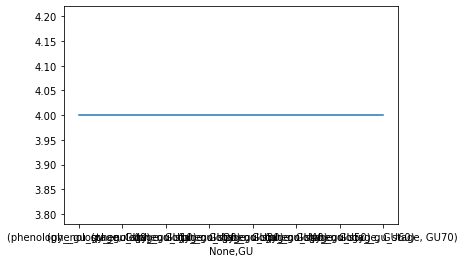

In [26]:
ds_out.phenology__gu_stage.to_dataframe().unstack(level='GU').plot()

<AxesSubplot:xlabel='None,GU'>

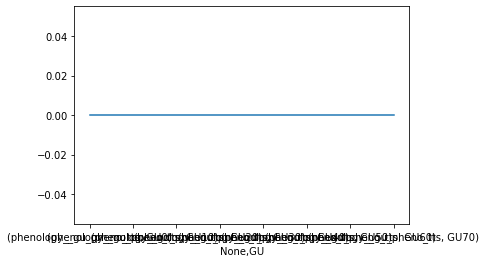

In [12]:
ds_out.phenology__gu_pheno_tts.to_dataframe().unstack(level='GU').plot()

<AxesSubplot:xlabel='None,GU'>

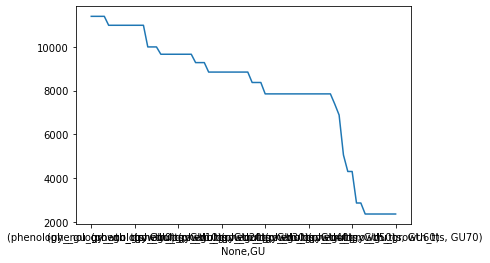

In [13]:
ds_out.phenology__gu_growth_tts.to_dataframe().unstack(level='GU').plot()

<AxesSubplot:xlabel='None,GU'>

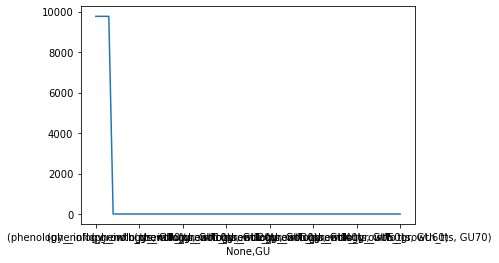

In [14]:
ds_out.phenology__inflo_growth_tts.to_dataframe().unstack(level='GU').plot()

<AxesSubplot:xlabel='None,GU'>

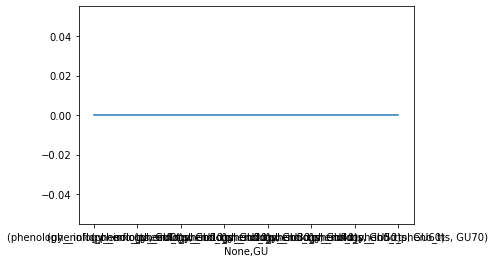

In [15]:
ds_out.phenology__inflo_pheno_tts.to_dataframe().unstack(level='GU').plot()

<AxesSubplot:xlabel='None,GU'>

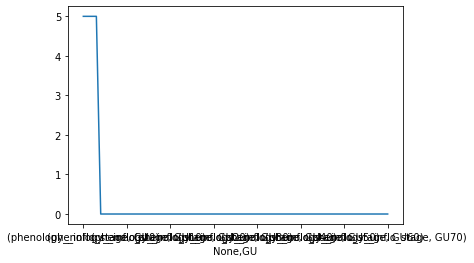

In [16]:
ds_out.phenology__inflo_stage.to_dataframe().unstack(level='GU').plot()

In [17]:
ds_out.growth__final_length_internodes[-1]

<xarray.DataArray 'growth__final_length_internodes' ()>
array(list([4.815498043322908, 4.435102129990696, 2.615749425581817, 1.542725478893529, 0.9098738128167182, 0.5366284323270503, 0.316494518608368]),
      dtype=object)
Coordinates:
    GU       <U10 'GU70'
Attributes:
    _FillValue:  0

In [18]:
ds_out.arch_dev__burst_date[-1]

<xarray.DataArray 'arch_dev__burst_date' ()>
array('NaT', dtype='datetime64[ns]')
Coordinates:
    GU       <U10 'GU70'
Attributes:
    _FillValue:  1970-01-01

In [19]:
ds_out.topology__cycle[-1]

<xarray.DataArray 'topology__cycle' ()>
array(5.)
Coordinates:
    GU       <U10 'GU70'
Attributes:
    _FillValue:  nan

In [20]:
ds_out.has_veg_children_within__has_veg_children_within[-1]

<xarray.DataArray 'has_veg_children_within__has_veg_children_within' ()>
array(0.)
Coordinates:
    GU       <U10 'GU70'
Attributes:
    _FillValue:  nan

In [21]:
np.random.default_rng(12345).binomial(1, [0.57297297,0.57297297,0.67132867,0.67132867,0.67132867], (5,))

array([1, 1, 0, 0, 1])